# Decision Tree

In [31]:
import pandas as pd 
import numpy as np #대규모 다차원 배열과 행렬을 지원
from sklearn.tree import DecisionTreeClassifier# skikit-lean은 분유,뢰귀,클러스팅 등을 위한 다양한 도구
from sklearn.model_selection import train_test_split#테스트 집합으로 분할하는 등 모델 선택을 위한 다양한 함수 제공
from sklearn import metrics #sklearn 머신 러닝 모델의 성능을 평가하기 위한 다양한 메트릭이 있음

## https://www.kaggle.com/fredericobreno/play-tennis

## 데이터 불러오기

In [32]:
df = pd.read_csv("./play_tennis.csv")

In [33]:
print (df)

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [34]:
df = df.drop("day", axis=1)

In [35]:
print (df)

     outlook  temp humidity    wind play
0      Sunny   Hot     High    Weak   No
1      Sunny   Hot     High  Strong   No
2   Overcast   Hot     High    Weak  Yes
3       Rain  Mild     High    Weak  Yes
4       Rain  Cool   Normal    Weak  Yes
5       Rain  Cool   Normal  Strong   No
6   Overcast  Cool   Normal  Strong  Yes
7      Sunny  Mild     High    Weak   No
8      Sunny  Cool   Normal    Weak  Yes
9       Rain  Mild   Normal    Weak  Yes
10     Sunny  Mild   Normal  Strong  Yes
11  Overcast  Mild     High  Strong  Yes
12  Overcast   Hot   Normal    Weak  Yes
13      Rain  Mild     High  Strong   No


## 데이터로 Features(X)와 Class(y) 만들기

In [36]:
X = np.array(pd.DataFrame(df ,columns=["outlook", "temp", "humidity", "wind"]))
y = np.array(pd.DataFrame(df, columns=["play"]))

In [37]:
print (X)
print (y)

[['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Overcast' 'Hot' 'High' 'Weak']
 ['Rain' 'Mild' 'High' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Strong']
 ['Overcast' 'Cool' 'Normal' 'Strong']
 ['Sunny' 'Mild' 'High' 'Weak']
 ['Sunny' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Mild' 'Normal' 'Weak']
 ['Sunny' 'Mild' 'Normal' 'Strong']
 ['Overcast' 'Mild' 'High' 'Strong']
 ['Overcast' 'Hot' 'Normal' 'Weak']
 ['Rain' 'Mild' 'High' 'Strong']]
[['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']]


## Train, Test set 분리

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #트레인과 테스트를 8:2로 나눔

In [39]:
print (X_test)

[['Overcast' 'Mild' 'High' 'Strong']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Rain' 'Mild' 'High' 'Strong']]


## Decision Tree 선언 및 학습

In [66]:
decision_tree_model = DecisionTreeClassifier() #분류작업에 사용되는 의사 결정 트리 기반 모델
decision_tree_model.fit(X_train, y_train) #훈련데이터를 사용하여 모델을 훈련하기 위해 decision_tree_model 개체에서 fit 매서드 호출
#X_train은 학습을 위한 기능 행렬 또는 입력데이터, y_train은 대상 변수 또는 학습 데이터
#y_pred = decision_tree_model.predict(X_test) #predict 방법은 훈련된 결정 트리 모델을 사용하여 데이터 테스트(X_test)에 대한 예측을 만드는데 사용
#원래 이렇게 사용하면 경고가 발생

DecisionTreeClassifier()

## String 형태의 데이터들을 모두 int 형으로 변경해줘야 됨

In [62]:
from sklearn.preprocessing import LabelEncoder#'LabelEncoder'는 범주형 또는 숫자가 아닌 변수를 숫자 값으로 인코딩하는 데 도움이 되는 scikit-learn(sklearn)의 유틸리티 클래스
#모델이 처리할 수 있도록 숫자 형식으로 변환해야 하는 숫자가 아닌 기능이 데이터에 포함된 경우 기계 학습 작업에서 일반적으로 사용
LE = LabelEncoder()#LE = LabelEncoder(): 이 줄은 LabelEncoder 클래스의 인스턴스를 생성하고 변수 LE에 할당합니다. 이제 LabelEncoder 개체를 사용하여 레이블 인코딩을 수행

In [42]:
for feature in df.columns: #열을 돌면서
    df[feature] = LE.fit_transform(df[feature]) #현재 기능의 값에 레이블 인코딩을 적용,
    #'fit_transform()' 메서드는 데이터에서 고유한 범주를 학습하고 값을 해당 숫자 레이블로 변환 그 값을 다시 열에 적용

In [43]:
print (df)

    outlook  temp  humidity  wind  play
0         2     1         0     1     0
1         2     1         0     0     0
2         0     1         0     1     1
3         1     2         0     1     1
4         1     0         1     1     1
5         1     0         1     0     0
6         0     0         1     0     1
7         2     2         0     1     0
8         2     0         1     1     1
9         1     2         1     1     1
10        2     2         1     0     1
11        0     2         0     0     1
12        0     1         1     1     1
13        1     2         0     0     0


In [67]:
X = np.array(pd.DataFrame(df ,columns=["outlook", "temp", "humidity", "wind"])) #df에서 특정 열을 선택 행렬 x를 만듬
#선택된 열만 pd.DataFrame으로 새 데이터 프레임을 생성, np.array()로 데이터 프레임을 NumPy 배열로 변환
y = np.array(pd.DataFrame(df, columns=["play"]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#학습과 테스트 집합으로 분할 scikit-learn의 train_test_split()함수 사용 70% 학습, 30% 테스트

In [68]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy', 
                                             max_features=3, min_samples_leaf=2)
#이 라인은 scikit-learn에서 DecisionTreeClassifier 클래스의 인스턴스를 생성, 'DecisionTreeClassifier'는 분류 작업에 사용되는 널리 사용되는 알고리즘
#criterion='entropy': 의사결정 트리의 노드를 분할하는 데 사용되는 기준을 지정, 
#엔트로피는 불순물의 척도이며 엔트로피를 기준으로 사용하는 것은 트리 구축 과정에서 정보 획득을 최대화하는 것을 목표
#max_features=3: 최상의 분할을 찾을 때 고려할 최대 기능 수를 지정, 이 경우 각 분할에서 세 가지 기능만 고려
#min_samples_leaf=2: 리프 노드에 있어야 하는 최소 샘플 수를 지정, 이 값보다 샘플 수가 적은 노드는 더 이상 분할되지 않음,
#트리의 복잡성을 제어하고 과적합을 방지하는 데 도움

decision_tree_model.fit(X_train, y_train)
#결정 트리 분류기 모델을 훈련 데이터에 맞춤
#fit() 메서드는 decision_tree_model 객체에서 호출되며 X_train은 기능 행렬이고 y_train은 대상 배열

y_pred = decision_tree_model.predict(X_test)
#y_pred = decision_tree_model.predict(X_test): 이 라인은 훈련된 의사 결정 트리 모델을 사용하여 테스트 데이터를 예측, predict() 메서드는 X_test를 특징 행렬로 사용하여 decision_tree_model 개체에서 호출
#이 모델은 교육 데이터의 학습된 패턴을 사용하여 테스트 데이터에 해당하는 레이블을 예측, 예측된 레이블은 y_pred 변수에 저장

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

In [46]:
print (y_pred)

[0 0 0 1 0]


In [47]:
print (y_test)

[[0]
 [1]
 [1]
 [1]
 [1]]


In [48]:
from sklearn.metrics import accuracy_score
# scikit-learn의 `metrics` 모듈에서 `accuracy_score` 함수를 가져옴,
# 정확도_점수` 함수는 실제 레이블과 비교하여 예측된 레이블의 정확도를 계산하는 데 사용

from sklearn.metrics import confusion_matrix
# scikit-learn의 `metrics` 모듈에서 `confusion_matrix` 함수를 가져옴,
# confusion_matrix` 함수는 분류 모델의 성능을 설명하는 테이블인 혼동 행렬을 계산하는 데 사용

print(accuracy_score(y_pred, y_test))
# `print(accuracy_score(y_pred, y_test))`: 이 줄은 모델 예측의 정확도 점수를 계산하여 출력
# 정확도_스코어` 함수는 `y_pred`를 예측 레이블로, `y_test`를 실제 레이블로 사용하여 호출
# 이 함수는 예측된 레이블과 실제 레이블을 비교하여 올바르게 분류된 샘플의 비율인 정확도를 반환

print(confusion_matrix(y_test, y_pred))
# `print(confusion_matrix(y_test, y_pred))`: 이 줄은 모델 예측의 혼동 행렬을 계산하여 출력,
# 이 함수는 `y_test`를 실제 레이블로, `y_pred`를 예측 레이블로 사용하여 `confusion_matrix` 함수를 호출
# 혼동 행렬은 정탐, 정탐, 오탐 및 미탐 예측의 수를 표시하여 모델의 성능을 요약


0.4
[[1 0]
 [3 1]]



## Visualize the Decision Tree result

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.5, 'x[1] <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]')]

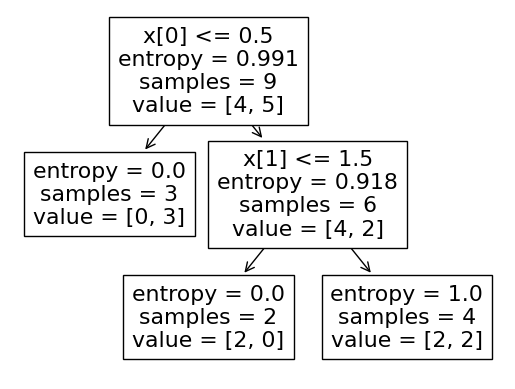

In [49]:
from sklearn import tree
# 의사결정 트리 기반 모델에 대한 기능을 제공하는 scikit-learn 라이브러리에서 tree 모듈을 가져옴
tree.plot_tree(decision_tree_model)
# 이 코드 행은 plot_tree 함수를 사용하여 의사 결정 트리 모델을 그림, 'decision_tree_model'은 시각화하려는 학습된 의사 결정 트리 모델을 나타냄


[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.5, 'x[1] <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]')]

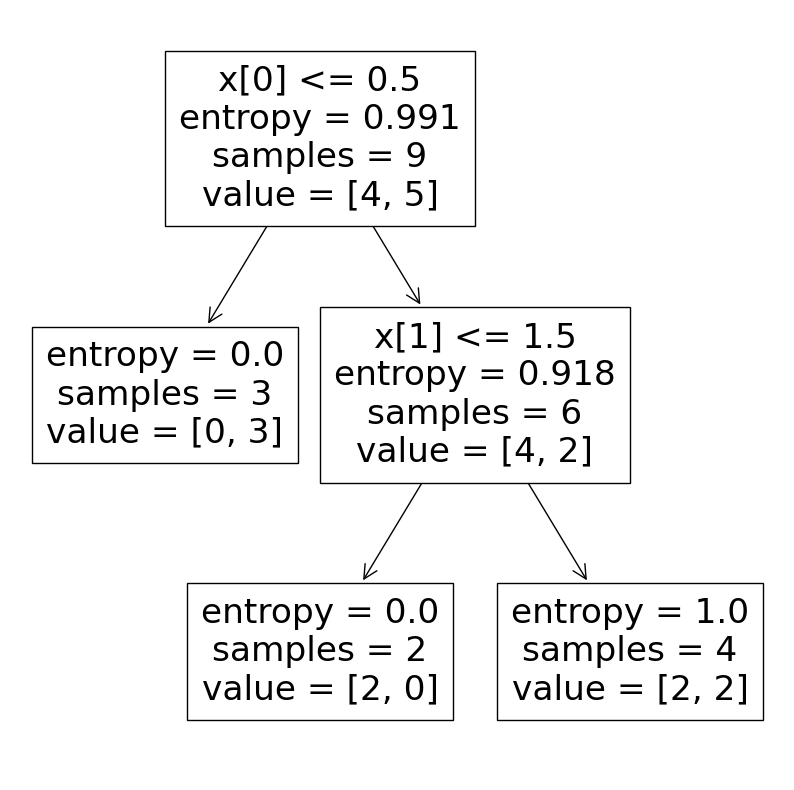

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) #figure 사이즈 조정
tree.plot_tree(decision_tree_model)

In [73]:
print (df.columns)

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


[Text(0.4, 0.8333333333333334, 'outlook <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = Yes'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.6, 0.5, 'wind <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = No'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes')]

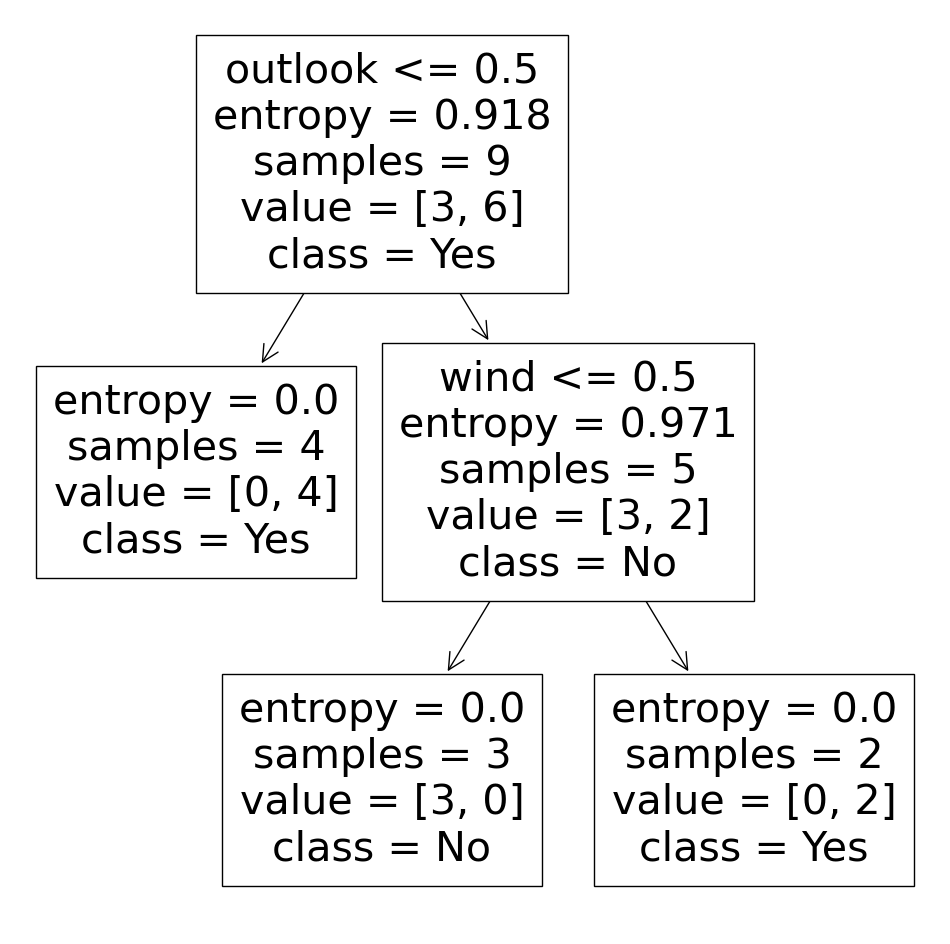

In [74]:
features = df.columns  # 열을 features 변수에 저장
class_name = {0: "No", 1: "Yes"}  # 클래스를 0과 1로 설정 딕셔너리로 설정
plt.figure(figsize=(12, 12))  # 피겨사이즈 설정
tree.plot_tree(decision_tree_model, feature_names=features,
               class_names=class_name)
# `decision_tree_model`을 입력으로 받아 트리 구조를 시각화, feature_names` 파라미터를 `features`로 설정하면 트리 다이어그램에 기능 이름이 표시
# class_names` 파라미터를 `class_name`으로 설정하면 트리 다이어그램에 해당 이름과 함께 클래스 레이블이 표시

# Gini 계산

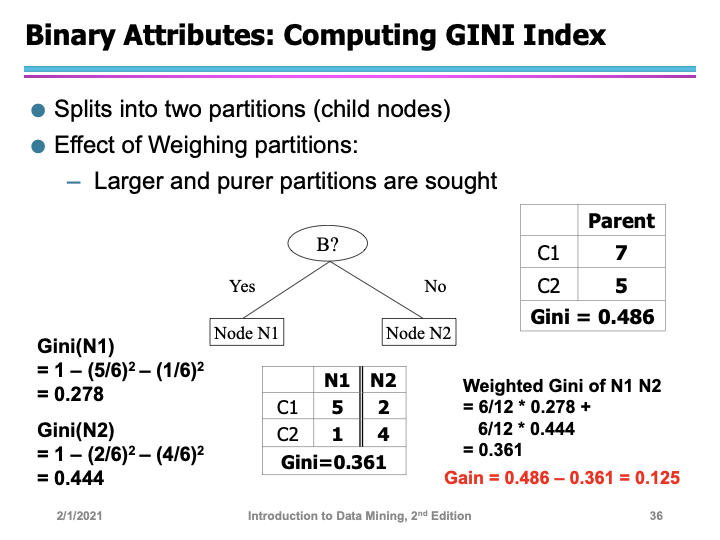

In [53]:
print (X_train)
print (y_train)

[[0 1 0 1]
 [0 0 1 0]
 [1 2 0 1]
 [0 2 0 0]
 [1 0 1 0]
 [1 2 0 0]
 [2 2 0 1]
 [1 2 1 1]
 [2 1 0 1]]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


In [54]:
X_train_df = pd.DataFrame(X_train) #학습 x y를 새로운 데이터프레임으로 만들고
y_train_df = pd.DataFrame(y_train)
train_df = pd.concat([X_train_df,y_train_df], axis=1) # 두개프레임을 합침
train_df.columns = df.columns # 원래 df 열을 새로 만든 데이터프레임으로 열을 가져옴

In [55]:
print (train_df)

   outlook  temp  humidity  wind  play
0        0     1         0     1     1
1        0     0         1     0     1
2        1     2         0     1     1
3        0     2         0     0     1
4        1     0         1     0     0
5        1     2         0     0     0
6        2     2         0     1     0
7        1     2         1     1     1
8        2     1         0     1     0


In [56]:
h0p0 = train_df[(train_df["humidity"]==0) & (train_df["play"]==0)]
h0p1 = train_df[(train_df["humidity"]==0) & (train_df["play"]==1)]
h1p0 = train_df[(train_df["humidity"]==1) & (train_df["play"]==0)]
h1p1 = train_df[(train_df["humidity"]==1) & (train_df["play"]==1)]

## GiniN1 (humidity 0)

In [57]:
gini_humidity_0 = 1 - (len(h0p0)/(len(h0p0) + len(h0p1)))**2 - (len(h0p1)/(len(h0p0) + len(h0p1)))**2
print (gini_humidity_0)

0.5


## GiniN2 (humidity 1)

In [58]:
gini_humidity_1 = 1 - (len(h1p0)/(len(h1p0) + len(h1p1)))**2 - (len(h1p1)/(len(h1p0) + len(h1p1)))**2
print (gini_humidity_1)

0.4444444444444444


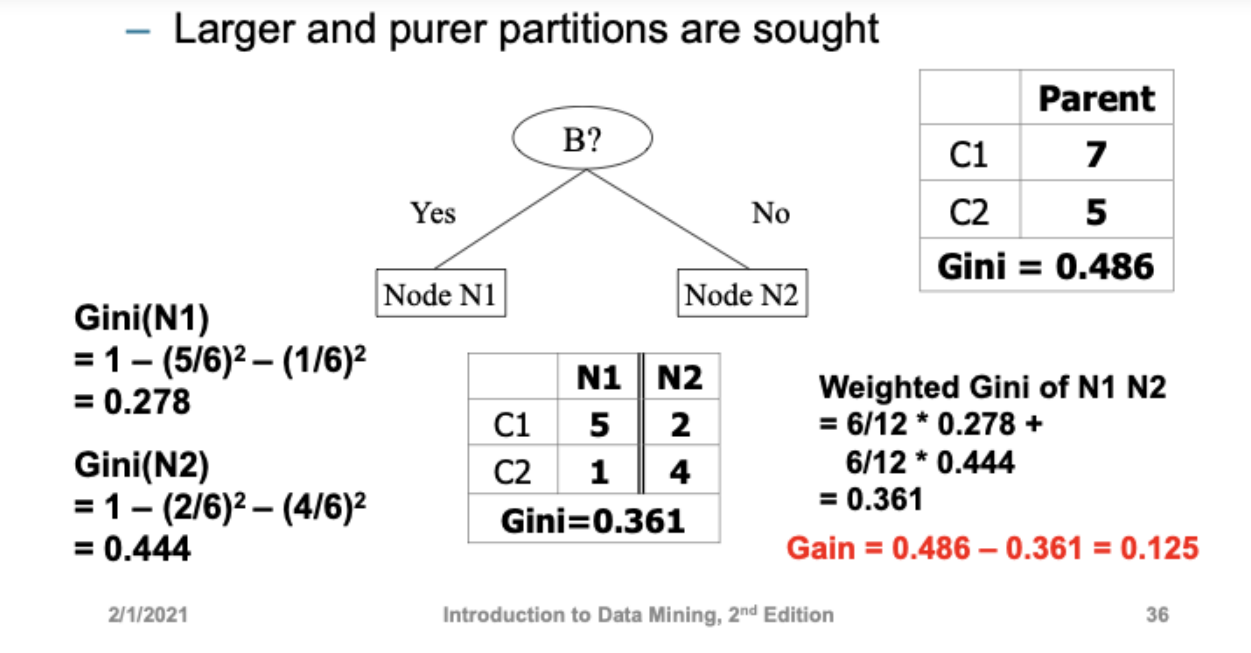

## Weighted Gini of N1 N2

In [59]:
((len(h0p0)+len(h0p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)) * gini_humidity_0) + ((len(h1p0)+len(h1p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)) * gini_humidity_1)

0.48148148148148145

# RedWine Quality Dataset + 추가로 Homework로 나갈 예정

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

다운 받고 불러와서 Decision Tree를 사용해서 분류 해볼것
Wine Quality(Class) 값은 0~10까지임.

따라서 2 class (x<5:0, x>=5:1) or 3 class 등으로 자유롭게 class를 나누어서 Decision Tree로 분류해보기

최소 10가지 이상의 다양한 종류의 실험을 해보고 가장 좋은성능을 가지는 실험 파라미터와 class 분류법을 찾기

 ex) 클래스 분류를 조정, Decision Tree 함수의 파라미터를 조정(Gini 계수, Entropy), Train/Test 나누는 비율 조정 등 